In [4]:
import pandas as pd
from variants_compare import VariantsCompare
from pm4py.objects.conversion.log import converter as log_converter

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
df = pd.read_csv('data/event_meta_table-mc.csv',sep=';')

In [6]:
df

,case:concept:name,concept:name,concept:flops,concept:kernel,concept:operation,timestamp:start
0,algorithm0,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml2, ml3, 0.0, ml4)",tmp3 = (C D),2022-12-20 15:53:12.869753
1,algorithm0,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml5)",tmp1 = (A B),2022-12-20 15:53:13.869753
2,algorithm0,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml5, ml4, 0.0, ml6)",tmp6 = (tmp1 tmp3),2022-12-20 15:53:14.869753
3,algorithm2,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml4)",tmp1 = (A B),2022-12-20 15:56:32.869753
4,algorithm2,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml4, ml2, 0.0, ml5)",tmp4 = (tmp1 C),2022-12-20 15:56:33.869753
5,algorithm2,gemm_2e+09,2.000000e+09,"gemm!('N', 'N', 1.0, ml5, ml3, 0.0, ml6)",tmp6 = (tmp4 D),2022-12-20 15:56:34.869753
6,algorithm4,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml1, ml2, 0.0, ml4)",tmp2 = (B C),2022-12-20 15:59:52.869753
7,algorithm4,gemm_2e+09,2.000000e+09,"gemm!('N', 'N', 1.0, ml4, ml3, 0.0, ml5)",tmp5 = (tmp2 D),2022-12-20 15:59:53.869753
8,algorithm4,gemm_2e+09,2.000000e+09,"gemm!('N', 'N', 1.0, ml0, ml5, 0.0, ml6)",tmp6 = (A tmp5),2022-12-20 15:59:54.869753
9,algorithm1,gemm_2e+07,2.000000e+07,"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml4)",tmp1 = (A B),2022-12-20 15:54:52.869753


In [7]:
xes_log = log_converter.apply(df)

In [8]:
for t in xes_log:
    for e in t:
        print(e['concept:name'],'(or)', e['concept:operation'])
    break

gemm_2e+07 (or) tmp3 = (C D)
gemm_2e+07 (or) tmp1 = (A B)
gemm_2e+07 (or) tmp6 = (tmp1 tmp3)


In [9]:
all_vars = list(df['case:concept:name'].unique())
best = ['algorithm0', 'algorithm1']
worst = ['algorithm3', 'algorithm4']
#worst = all_vars.copy()
#for v in best:
#    worst.remove(v)

#activity_key = 'concept:name'
activity_key = 'concept:operation'


In [10]:

vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key)

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


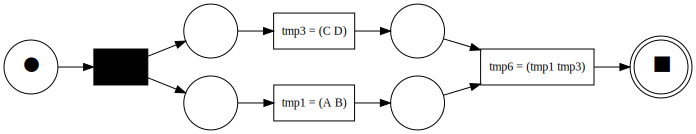

In [11]:
vc.show_petrinet(best,activity_key=activity_key)

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


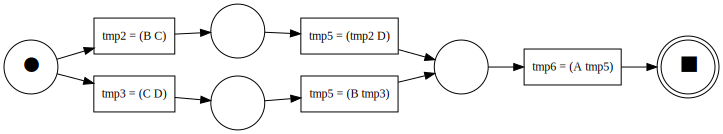

In [12]:
vc.show_petrinet(worst,activity_key=activity_key)

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


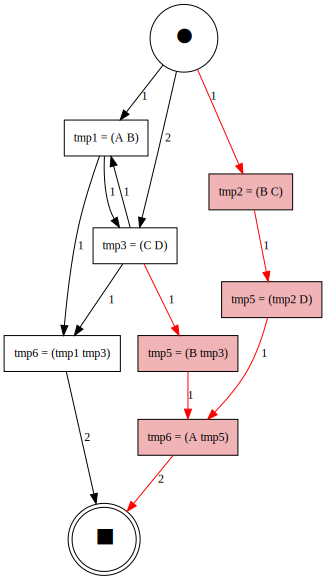

In [13]:
gviz = vc.get_dfg_minus_best()
gviz

In [14]:
gviz.render(filename='output/mc4', format='pdf')

'output/mc4.pdf'